In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(0)
%matplotlib inline

#### 加载数据

In [2]:
digits = load_digits()
df = pd.DataFrame(digits.data)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
# 8 * 8 的图片
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
def plot_digits(data):
    """绘制数据"""
    
    fig, ax = plt.subplots(4
                           , 5
                           ,figsize = (12, 6)
                           , subplot_kw={"xticks":[], "yticks":[]}
                          )
    # 绘制数据
    for i, ax in enumerate(ax.flat):
        ax.imshow(data[i,:].reshape(8, 8), cmap="gray")

#### 原始数据

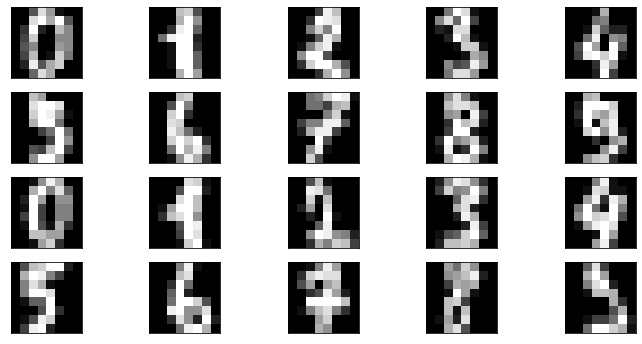

In [7]:
plot_digits(digits.data)

#### 给数据加点噪声

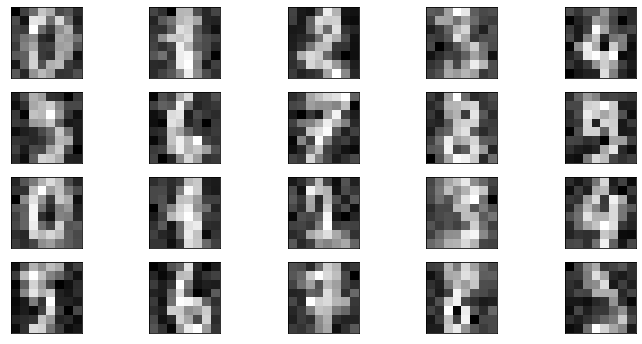

In [8]:
noisy = np.random.normal(digits.data, 2)
plot_digits(noisy)

#### PCA 降噪

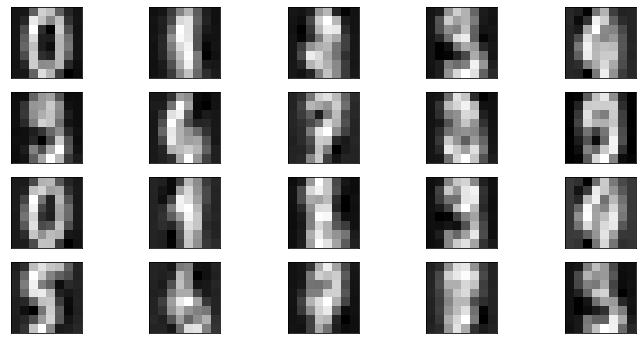

In [13]:
# 1.降维去噪
pca = PCA(n_components=0.5).fit(noisy)
X_dir = pca.transform(noisy)

# 2.升维重构
denoisy = pca.inverse_transform(X_dir)

plot_digits(denoisy)

#### 选择最优的维度减少

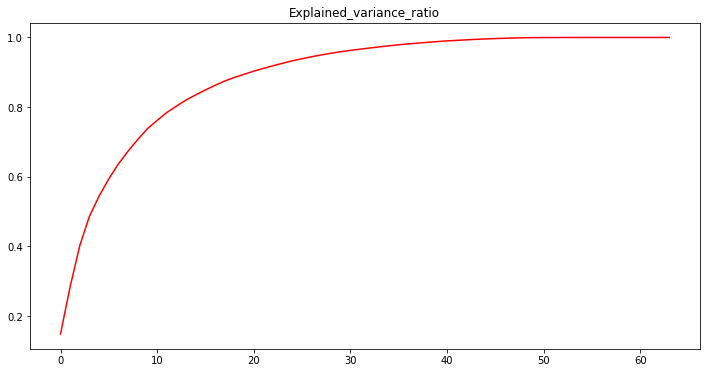

In [10]:
result = []

plt.figure(figsize=(12, 6))
pca = PCA().fit(digits.data)
# 可解释性方差率(每一维度特征占总信息量的占比)
result = np.cumsum(pca.explained_variance_ratio_)


plt.plot(range(digits.data.shape[1]), result, color="r" )
plt.title("Explained_variance_ratio")
plt.show()